### DATA 620
#### Project 1   
### [Video Presentation]()
##### Group Four
- Santosh Cheruku
- Vinicio Haro
- Javern Wilson
- Saayed Alam  


In [234]:
# load libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.algorithms import bipartite as bi
% matplotlib inline

In this project, we are asked to identify and load a network dataset that has some categorical information available for each node. The dataset group 4 has selected to use is the highly popular flights database. The origin of this data can be found [here](https://openflights.org/data.html). Centrality measures can be used to predict (positive or negative) outcomes for a node. In our dataset we will predict **flight delays** (positive) or **no delays** (negative) outcomes for each **flight** (node). 

In [235]:
# load data
airport = pd.read_csv("https://raw.githubusercontent.com/saayedalam/Data/master/Project1.1_data.csv")
airport.head()

,Origin,Destination,Delay
0,EWR,IAH,13
1,LGA,IAH,24
2,JFK,MIA,35
3,JFK,BQN,-19
4,LGA,ATL,-31


First we load the dataset and then create a graph using the `Networkx` package and print some graph information. The graph has 107 nodes or airports, 223 edges or flights and 4.17 of average degree. 

In [236]:
# load dataframe and print graph info
G = nx.from_pandas_edgelist(airport, source = 'Origin', target = 'Destination', create_using = nx.Graph())
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 224
Average degree:   4.1869


In [237]:
print(bi.is_bipartite(G))

False


Next we visualize the graph by creating unique source nodes (departure airport), directed nodes (arrival airport) and nodes with more than 1 edge (flights). 

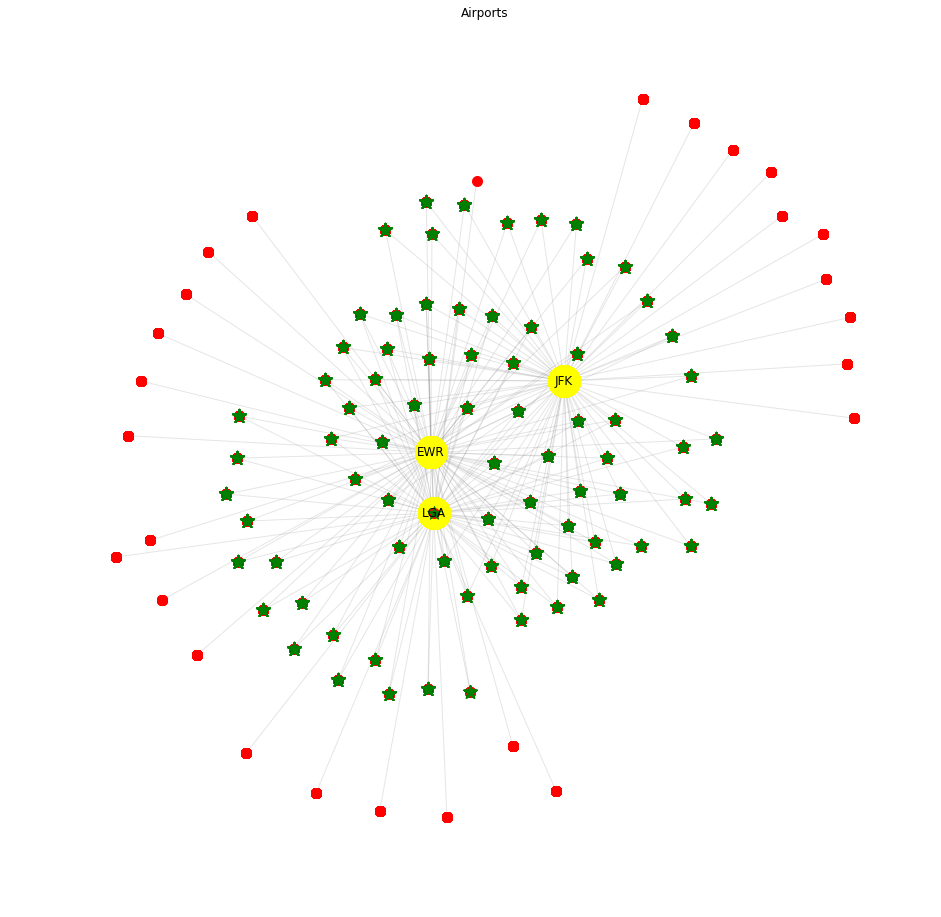

In [238]:
# adjust figure size
plt.figure(figsize=(16, 16))

# create variables for visualization
sp = nx.spring_layout(G)
n1 = list(airport.Origin)
n2 = list(airport.Destination)

# draw source nodes
nx.draw_networkx_nodes(G, sp, nodelist = n1, aplha = 0.2, node_size = 1000, node_color = 'yellow')

# draw target nodes
nx.draw_networkx_nodes(G, sp, nodelist = n2, node_color = 'red', node_size = 100)

# draw similar nodes with more than 1 edge
pop_airport = [n2 for n2 in n2 if G.degree(n2) > 1]
nx.draw_networkx_nodes(G, sp, nodelist = pop_airport, node_color = 'green', 
                       node_shape = '*', node_size = 200)
nx.draw_networkx_edges(G, sp, width = 1, edge_color = "gray", alpha = 0.2)

# add label
nx.draw_networkx_labels(G, sp, labels = dict(zip(n1, n1)))
plt.axis("off")
plt.title("Airports")
plt.show()

For each of the nodes in the dataset, we calculate degree centrality and eigenvector centrality and sort by descending order.

In [239]:
# calculate centrality
centrality = pd.DataFrame({
    "Degree Centrality" : list(nx.degree_centrality(G).values()),
    "Eigenvector Centrality" : list(nx.eigenvector_centrality(G).values())
}, index = list(G)).sort_values(by = ["Degree Centrality", "Eigenvector Centrality"], ascending = False)

centrality.head(5)

,Degree Centrality,Eigenvector Centrality
EWR,0.811321,0.467899
JFK,0.660377,0.364895
LGA,0.650943,0.401829
IAH,0.028302,0.088909
MIA,0.028302,0.088909


Finally we compare our centrality measures across our categorical groups.

In [240]:
B = net.Graph()

for i in range(len(airport)):
    B.add_edge(airport.iloc[i][0], airport.iloc[i][1], weight = int(airport.iloc[i][2]))

print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 224
Average degree:   4.1869


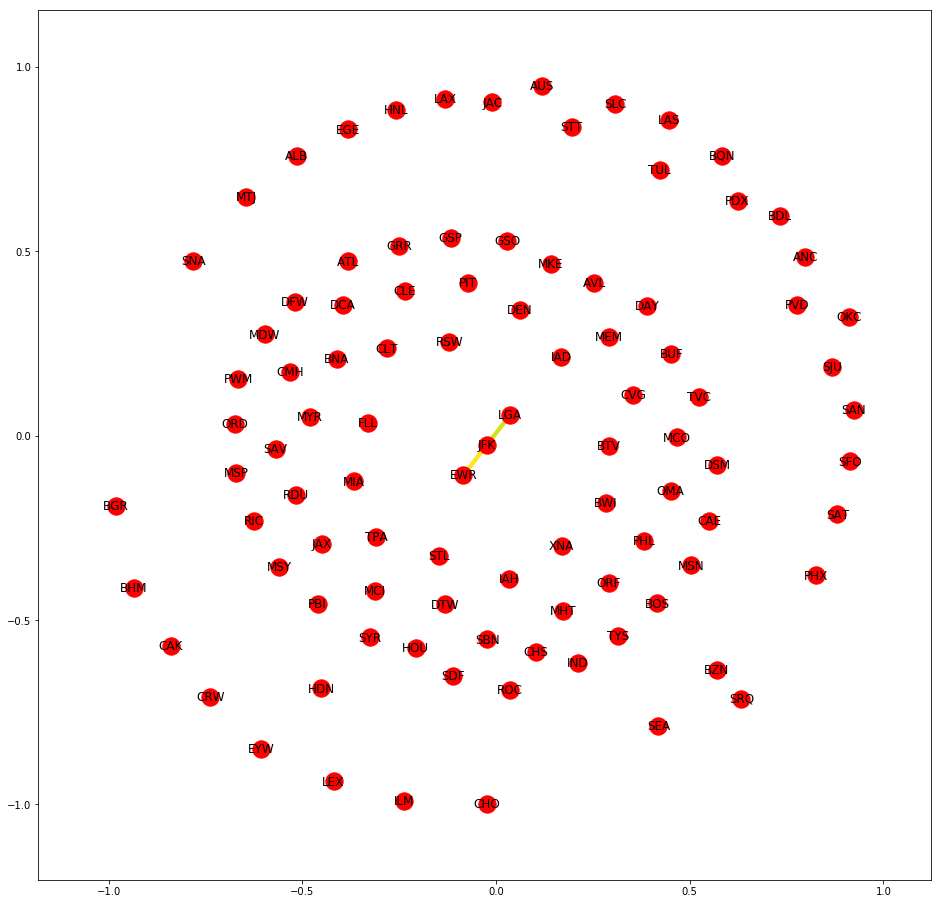

In [241]:
# adjust figure size
plt.figure(figsize=(16, 16))

orgnet = bi.weighted_projected_graph(B, airport['Origin'], ratio = False)
weights = [math.log(edata['weight']) for f, t, edata in orgnet.edges(data = True)]
nx.draw_networkx(orgnet, width = weights, edge_color = weights)

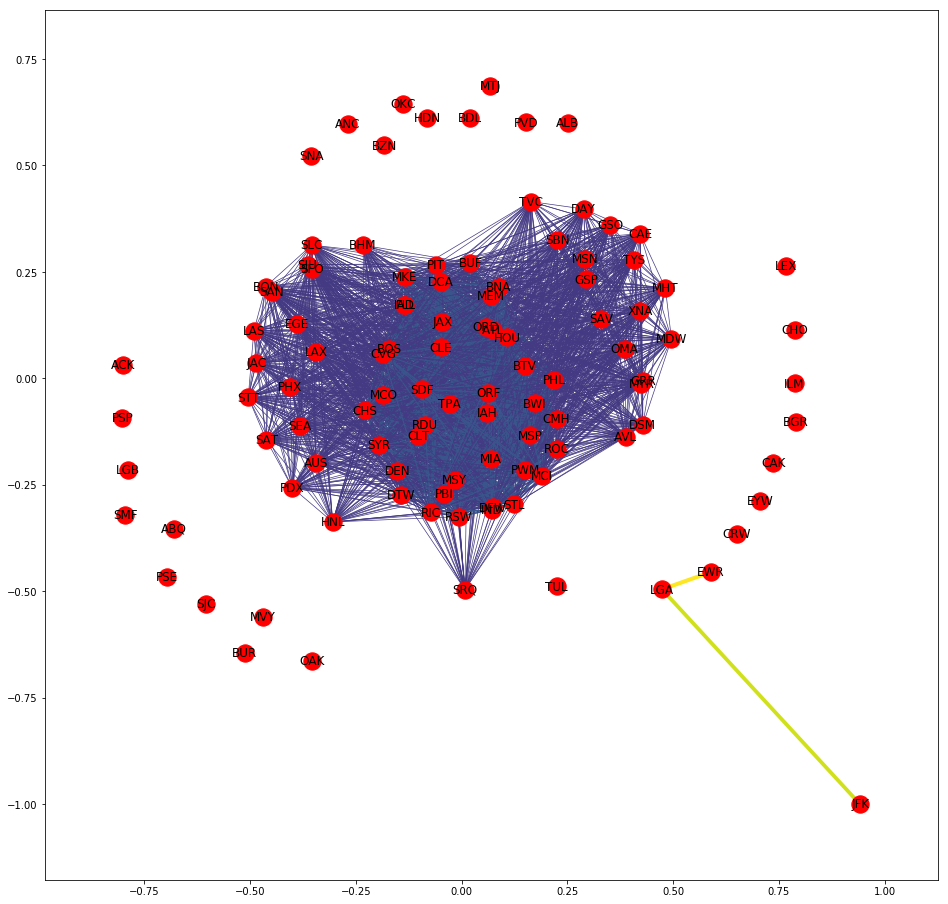

In [242]:
# adjust figure size
plt.figure(figsize=(16, 16))

desnet = bi.weighted_projected_graph(B, airport['Destination'], ratio = False)
weights = [math.log(edata['weight']) for f, t, edata in desnet.edges(data = True)]
nx.draw_networkx(desnet, width = weights, edge_color = weights)